In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('monthly_co2.csv', index_col=[0, 1])
df.head()

co2
year month        
1958 3      315.70
     4      317.45
     5      317.51
     6      317.24
     7      315.86

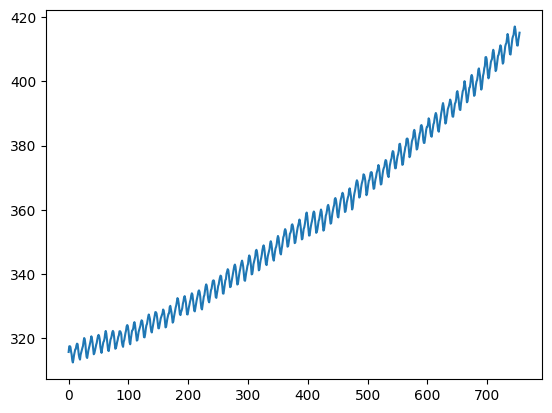

In [9]:
plt.plot(df.co2.values)

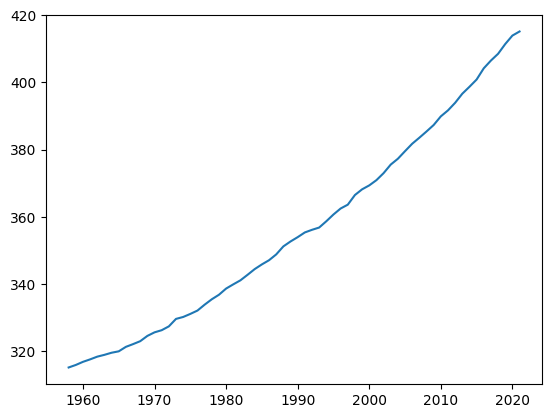

In [10]:
by_year = df.groupby('year').mean().co2
plt.plot(by_year)

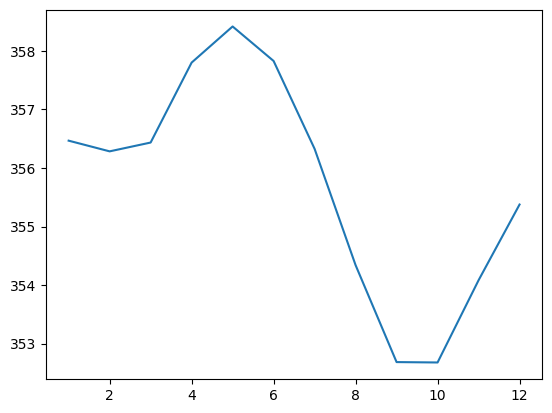

In [11]:
by_month = df.groupby('month').mean().co2
plt.plot(by_month)